In [8]:
import pandas as pd
import numpy as np
import statistics
import math
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import keras
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [53]:
data = pd.read_csv("roundnessdata.csv",skip_blank_lines = False) #Database1

In [57]:
data.roundness

0       0.146758
1       0.119043
2       0.149369
3       0.127394
4       0.095631
5       0.142799
6       0.128620
7       0.135684
8       0.134025
9       0.133008
10      0.128317
11      0.135888
12      0.132935
13      0.147340
14      0.136824
15      0.109492
16      0.129685
17      0.137099
18      0.141224
19      0.105855
20      0.138122
21      0.050000
22      0.129254
23      0.128558
24      0.127953
25      0.089343
26      0.149074
27      0.134504
28      0.140256
29      0.142661
          ...   
1804    0.865999
1805    0.851098
1806    0.859330
1807    0.855567
1808    0.910000
1809    0.883000
1810    0.924000
1811    0.869699
1812    0.867424
1813    0.852454
1814    0.873721
1815    0.873828
1816    0.852000
1817    0.870000
1818    0.861640
1819    0.888000
1820    0.868000
1821    0.938000
1822    0.932000
1823    0.894564
1824    0.899108
1825    0.944000
1826    0.924155
1827    0.899000
1828    0.941304
1829    0.903000
1830    0.933000
1831    0.9180

In [ ]:
##Neural network, fitting, prediction and plots of train and test sets against prediction
train_x = data.iloc[:,1:data.shape[1]]
train_y = pd.DataFrame(data.roundness)
train_x, test_x, train_y, test_y = train_test_split(train_x, train_y, test_size=0.1)

sc = StandardScaler() 
train_x = sc.fit_transform(train_x) 
test_x = sc.transform(test_x)

n_cols = train_x.shape[1] 
model = Sequential() 
model.add(Dense(1000, activation="relu", input_shape=(n_cols,))) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(150,activation="relu")) 
model.add(Dense(400,activation="relu")) 
model.add(Dense(75,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(500,activation="relu")) 
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1,activation="linear")) 
opt = keras.optimizers.Adam(
    learning_rate=0.001,
    beta_1=0.50,
    beta_2=0.7,
    epsilon=1e-13)

model.compile(optimizer=opt, loss='mse',metrics=['mae','mse','mape'])

early_stopping_monitor = EarlyStopping(patience=18,monitor='loss')
model.fit(train_x,train_y,validation_data = (test_x,test_y),callbacks=[early_stopping_monitor], epochs=600,verbose=0)

#
train_y = train_y.reset_index().sort_values('index') 
train_x = train_x[train_y.index]
train_y = train_y.reset_index() 
ynew = model.predict(train_x) 
diff = abs(ynew - train_y) 
dummy_y = train_y 
dummy_y['predicted'] = ynew 
mse = mean_squared_error(dummy_y['roundness'], dummy_y['predicted']) 
me = statistics.stdev(dummy_y['predicted'])/math.sqrt(dummy_y['predicted'].shape[0]) 
fig0 = plt.figure(0,figsize=(20,10)) 
plt.plot(dummy_y['predicted'].sort_index(), label="Prediction") 
plt.plot(dummy_y['roundness'].sort_index(), label="Training set") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Roundness degree', fontsize=30) 
plt.xlabel('Images', fontsize=30) 
plt.legend(loc="upper left")

#plt.title("Resultado del entrenamiento de la red neuronal profunda",fontsize=35)
plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True)
plt.show 
plt.savefig('trainingComparition.png')

##Test

test_res = test_y 

test_res = test_res.reset_index().sort_values('index') 
test_x = test_x[test_res.index]
test_res = test_res.reset_index() 
ynew = model.predict(test_x) 
diff2 = abs(ynew - test_y) 
test_res['predicted'] = ynew 
mse2 = mean_squared_error(test_res['roundness'], test_res['predicted']) 
me2 = statistics.stdev(test_res['predicted'])/math.sqrt(test_res['predicted'].shape[0]) 
plt.figure(figsize=(20,10)) 
plt.plot(test_res['predicted'].sort_index(), label="Prediction") 
plt.plot(test_res['roundness'].sort_index(), label="Test set") 
plt.rc('legend', fontsize=25) 
plt.ylabel('Roundness degree', fontsize=30) 
plt.xlabel('Images', fontsize=30) 
plt.legend(loc="upper left")

plt.xticks(size = 25) 
plt.yticks(size = 25) 
plt.grid(True) 
plt.show
plt.savefig('testComparition.png')

In [45]:
#Mean squared error of training set
mse

0.0030994580925655804

In [46]:
#Mean error of training set
me

0.00715509193897901

In [47]:
#Mean squared error of test set
mse2

0.05017247098857548

In [48]:
#Mean error of test set
me2

0.01713843388291858

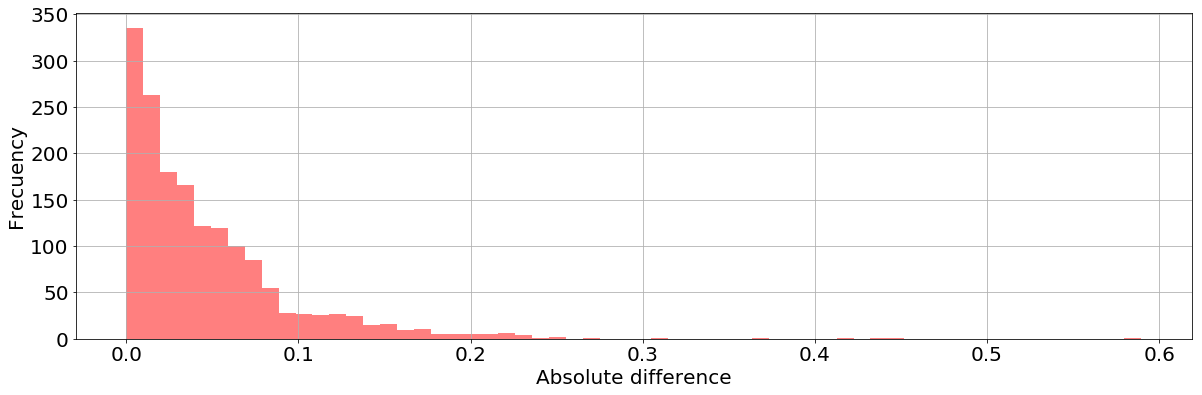

In [22]:
#Histogram of absolute differences Train set
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Absolute difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorAbTrain.png')

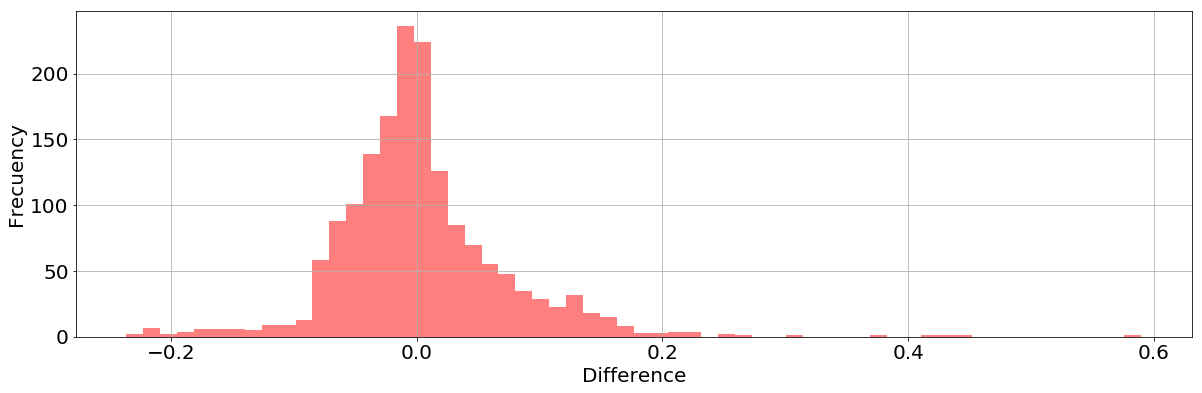

In [23]:
#Histogram of differences Train set
er = dummy_y['roundness']-dummy_y['predicted']
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(er, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorTrain.png')

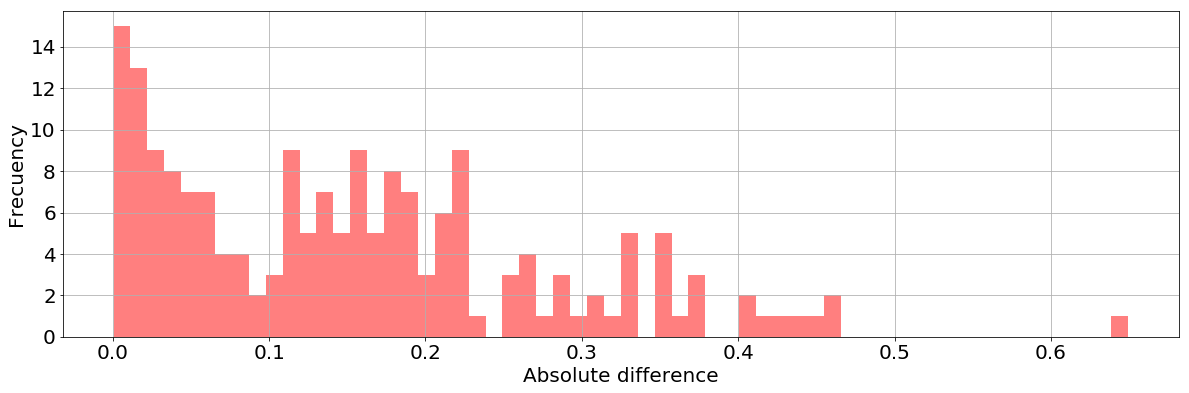

In [24]:
#Histogram of absolute differences test set
abEr = abs(test_res['roundness']-test_res['predicted'])
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(abEr, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Absolute difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorAbTest.png')

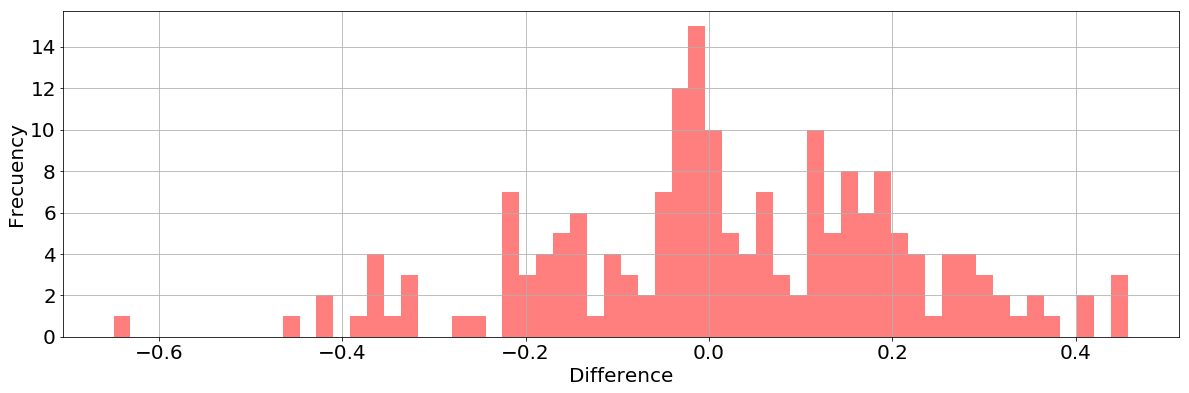

In [26]:
#Histogram of differences test set
er = test_res['roundness']-test_res['predicted']
fig=plt.figure(figsize=(20,6))
n, bins, patches = plt.hist(er, 60, facecolor='red', alpha=0.5)

# add a 'best fit' line
plt.xlabel('Difference', fontsize=20)
plt.ylabel('Frecuency', fontsize=20)

# Tweak spacing to prevent clipping of ylabel
plt.xticks(size = 20)
plt.yticks(size = 20)
plt.grid(True)
#plt.title("Histograma del error absoluto",fontsize=28)
plt.show()
fig.savefig('histogramaErrorTest.png')

In [44]:
abEr = abs(dummy_y['roundness']-dummy_y['predicted'])
set1 = abEr[abEr < 0.05]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

70.66666666666667

In [52]:
abEr = abs(test_res['roundness']-test_res['predicted'])
set1 = abEr[abEr < 0.2]
porc = 100*set1.shape[0]/abEr.shape[0]
porc

69.02173913043478